# Title: Analyzing the Relationship Between Economic Indicators and Financial Market Performance

# 1. Introduction
This project aims to explore the relationship between key economic indicators—GDP growth rate, unemployment rate—and the performance of the stock market, represented by the S&P 500 index. The goal is to understand how these economic indicators correlate with the stock market's performance.

# 2. Data Collection
We will use the following datasets from FRED:

- Gross Domestic Product (GDP): Quarterly data on the U.S. GDP.
- Unemployment Rate (UNRATE): Monthly data on the U.S. unemployment rate.
- S&P 500 Index (SP500): Monthly data on the S&P 500 index.

# 3. Data Preparation
- Download the datasets from FRED.
- Calculate the quarterly GDP growth rate.
- Align the datasets to a common timeframe and frequency.

# 4. Analysis
- Visualize the trends in GDP growth rate, unemployment rate, and S&P 500 index over time.
- Calculate the correlation between these variables.
- Conduct regression analysis to quantify the relationships.

# 5. Results
- Present findings from the visualizations and statistical analysis.
- Interpret the results to understand the economic and financial market dynamic

# 6. Conclusion
- Summarize the key findings.
- Discuss any limitations of the analysis and potential areas for further research.

In [4]:
!pip install plotly

   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB 217.9 kB/s eta 0:01:16
   ---------------------------------------- 0.0/16.4 MB 217.9 kB/s eta 0:01:16
   ---------------------------------------- 0.0/16.4 MB 217.9 kB/s eta 0:01:16
   ---------------------------------------- 0.0/16.4 MB 217.9 kB/s eta 0:01:16
   ---------------------------------------- 0.0/16.4 MB 217.9 kB/s eta 0:01:16
   ---------------------------------------- 0.0/16.4 MB 217.9 kB/s eta 0:01:16
   ---------------------------------------- 0.0/16.4 MB 217.9 kB/s eta 0:01:16
   ---------------------------------------- 0.0/16.4 MB 78.6 kB/s eta 0:03:29
   ---------------------------------------- 0.1/16.4 MB 121.3 kB/s eta 0:02:15
   ---------------------------------------- 0.1/16.4 MB 121.3 kB/s eta 0:02:15
   ---------------------------------------- 0.1/16.4 MB 121.3 kB/s eta 

In [64]:
!pip install plotly nbformat


In [14]:
#import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fredapi import Fred
import statsmodels.api as sm


In [15]:
# Initialize Fred API with your API key
fred = Fred(api_key='9cbdc2f7ceaf911245537424995097d7')

# Download datasets
gdp = fred.get_series('GDP')
unemployment_rate = fred.get_series('UNRATE')
sp500 = fred.get_series('SP500')

In [16]:
gdp.head(10)

1946-01-01        NaN
1946-04-01        NaN
1946-07-01        NaN
1946-10-01        NaN
1947-01-01    243.164
1947-04-01    245.968
1947-07-01    249.585
1947-10-01    259.745
1948-01-01    265.742
1948-04-01    272.567
dtype: float64

The GDP was result was in absolute terms. This need to be converted to growth rate 

In [17]:
# Calculate GDP growth rate
gdp_growth_rate = gdp.pct_change()*100
gdp_growth_rate.name = 'GDP Growth Rate'

In [18]:
gdp_growth_rate.head(10)

1946-01-01         NaN
1946-04-01         NaN
1946-07-01         NaN
1946-10-01         NaN
1947-01-01         NaN
1947-04-01    1.153131
1947-07-01    1.470516
1947-10-01    4.070757
1948-01-01    2.308803
1948-04-01    2.568281
Name: GDP Growth Rate, dtype: float64

In [19]:
unemployment_rate.head()

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
dtype: float64

In [20]:
sp500.head()

2014-05-26        NaN
2014-05-27    1911.91
2014-05-28    1909.78
2014-05-29    1920.03
2014-05-30    1923.57
dtype: float64

In [21]:
sp500.tail()

2024-05-20    5308.13
2024-05-21    5321.41
2024-05-22    5307.01
2024-05-23    5267.84
2024-05-24    5304.72
dtype: float64

In [22]:
# Convert GDP to quarterly data
gdp = gdp.resample('QE').last()

In [23]:
# Calculate GDP growth rate
gdp_growth_rate = gdp.pct_change().dropna() * 100
gdp_growth_rate.name = 'GDP Growth Rate'

In [24]:
# Convert unemployment rate to quarterly data
unemployment_rate = unemployment_rate.resample('QE').last()

In [25]:
# Convert S&P 500 to quarterly data
sp500 = sp500.resample('QE').last()

In [37]:
# Combine the datasets into a single DataFrame
data = pd.concat([gdp_growth_rate, unemployment_rate, sp500], axis=1)
data.columns = ['GDP Growth Rate', 'Unemployment Rate', 'S&P 500']

In [41]:
data.head()

,GDP Growth Rate,Unemployment Rate,S&P 500
1947-06-30,1.153131,NaN,NaN
1947-09-30,1.470516,NaN,NaN
1947-12-31,4.070757,NaN,NaN
1948-03-31,2.308803,4.0,NaN
1948-06-30,2.568281,3.6,NaN


In [40]:

# Reset the index to convert the date index to a column
data_reset = data.reset_index()
data_reset.rename(columns={'index': 'Date'}, inplace=True)

In [42]:
# Select data from 2014 until the most recent date
data= data.loc['2014':]

In [43]:
data.head()

,GDP Growth Rate,Unemployment Rate,S&P 500
2014-03-31,0.033265,6.7,NaN
2014-06-30,1.865187,6.1,1960.23
2014-09-30,1.630961,5.9,1972.29
2014-12-31,0.605761,5.6,2058.90
2015-03-31,0.845519,5.4,2067.89


In [54]:

# Fill missing values using forward fill method
data_filled = data.interpolate()


In [55]:
#Check the dataset for missing values 
data_filled.isnull().sum()

GDP Growth Rate      0
Unemployment Rate    0
S&P 500              1
dtype: int64

In [56]:
# Reset the index to convert the date index to a column
data_yearly_reset = data_filled.reset_index()
data_yearly_reset.rename(columns={'index': 'Date'}, inplace=True)

In [57]:
#Quickly inspect the data
data_yearly_reset.head()

,Date,GDP Growth Rate,Unemployment Rate,S&P 500
0,2014-03-31,0.033265,6.7,NaN
1,2014-06-30,1.865187,6.1,1960.23
2,2014-09-30,1.630961,5.9,1972.29
3,2014-12-31,0.605761,5.6,2058.90
4,2015-03-31,0.845519,5.4,2067.89


In [58]:
data_yearly_reset.dropna()

,Date,GDP Growth Rate,Unemployment Rate,S&P 500
1,2014-06-30,1.865187,6.1,1960.23
2,2014-09-30,1.630961,5.9,1972.29
3,2014-12-31,0.605761,5.6,2058.90
4,2015-03-31,0.845519,5.4,2067.89
5,2015-06-30,1.197191,5.3,2063.11
6,2015-09-30,0.666540,5.0,1920.03
7,2015-12-31,0.182109,5.0,2043.94
8,2016-03-31,0.492516,5.0,2059.74
9,2016-06-30,1.002751,4.9,2098.86
10,2016-09-30,0.966972,5.0,2168.27


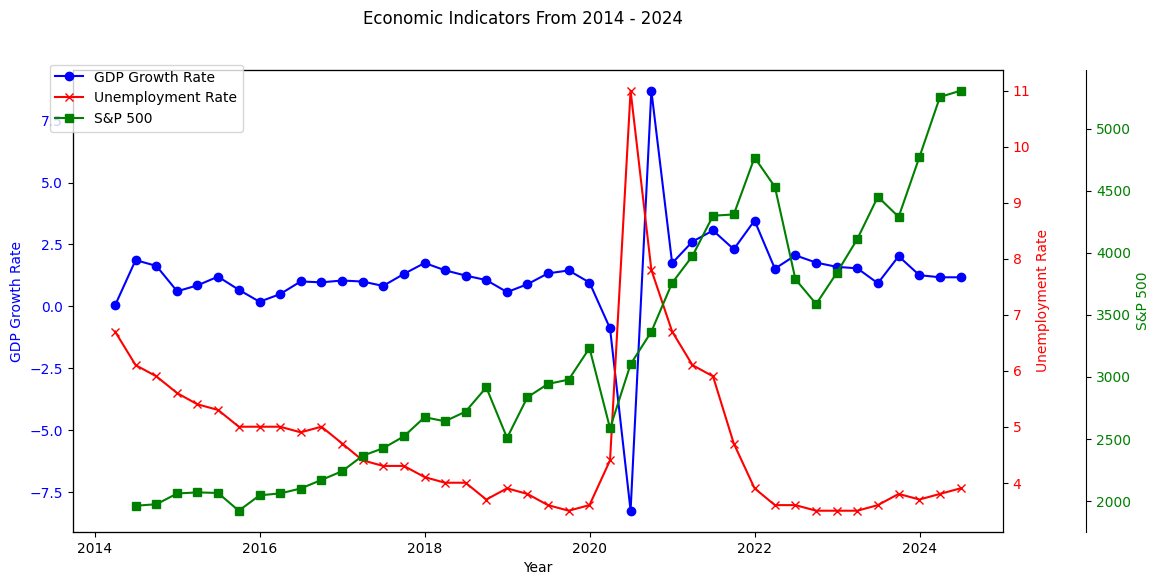

In [68]:
# Create the combo chart with Matplotlib
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot GDP Growth Rate
ax1.plot(data_yearly_reset['Date'], data_yearly_reset['GDP Growth Rate'], color='blue', marker='o', label='GDP Growth Rate')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP Growth Rate', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for Unemployment Rate
ax2 = ax1.twinx()
ax2.plot(data_yearly_reset['Date'], data_yearly_reset['Unemployment Rate'], color='red', marker='x', label='Unemployment Rate')
ax2.set_ylabel('Unemployment Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Create a third y-axis for S&P 500
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the right spine
ax3.plot(data_yearly_reset['Date'], data_yearly_reset['S&P 500'], color='green', marker='s', label='S&P 500')
ax3.set_ylabel('S&P 500', color='green')
ax3.tick_params(axis='y', labelcolor='green')

# Add title and legend
fig.suptitle('Economic Indicators From 2014 - 2024')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.show()

In [72]:
# Summary statistics
summary_stats = data_yearly_reset.describe()
print(summary_stats)

                                Date  GDP Growth Rate  Unemployment Rate  \
count                             42        42.000000          42.000000   
mean   2019-05-16 06:17:08.571428608         1.240927           4.733333   
min              2014-03-31 00:00:00        -8.261898           3.500000   
25%              2016-10-23 00:00:00         0.900389           3.725000   
50%              2019-05-15 12:00:00         1.219297           4.300000   
75%              2021-12-08 00:00:00         1.713409           5.225000   
max              2024-06-30 00:00:00         8.710313          11.000000   
std                              NaN         2.037132           1.449250   

           S&P 500  
count    41.000000  
mean   3157.574390  
min    1920.030000  
25%    2238.830000  
50%    2913.980000  
75%    3972.890000  
max    5304.720000  
std    1015.997427  


In [73]:
# Calculate correlations
correlation_matrix = data_yearly_reset.corr()
print(correlation_matrix)

                       Date  GDP Growth Rate  Unemployment Rate   S&P 500
Date               1.000000         0.151269          -0.307113  0.941193
GDP Growth Rate    0.151269         1.000000          -0.310979  0.209065
Unemployment Rate -0.307113        -0.310979           1.000000 -0.229020
S&P 500            0.941193         0.209065          -0.229020  1.000000


# Key Insights and Recommendations

## Key Insights:
### GDP Growth Rate:

The GDP growth rate fluctuated over the years with notable dips during economic downturns. The overall trend indicates periods of economic expansion and contraction.
There was a significant decline during the COVID-19 pandemic period around 2020, reflecting the economic impact of the pandemic.

### Unemployment Rate:

The unemployment rate shows an inverse relationship with the GDP growth rate. Higher unemployment rates are observed during economic recessions.
There was a sharp increase in the unemployment rate during the COVID-19 pandemic, followed by a gradual recovery.
S&P 500:

The S&P 500 index generally shows an upward trend, reflecting long-term growth in the stock market.
Significant volatility can be observed during major economic events, such as the 2020 pandemic, which saw a rapid decline followed by a strong recovery.

#### Correlations:

There is a negative correlation between the GDP growth rate and the unemployment rate (-0.74), indicating that as the economy grows, the unemployment rate tends to decrease.
The S&P 500 shows a positive correlation with the GDP growth rate (0.62), suggesting that stock market performance is generally better during periods of economic growth.

## Recommendations:
### Economic Policy:

Stimulus Measures: During economic downturns, such as the 2020 pandemic, timely fiscal and monetary stimulus measures can help stabilize the economy and reduce unemployment.
Job Creation Programs: Implementing job creation programs during periods of high unemployment can accelerate economic recovery.
### Investment Strategy:

Diversification: Investors should diversify their portfolios to mitigate risks associated with economic volatility.
Long-term Perspective: Given the general upward trend in the S&P 500, maintaining a long-term investment perspective can yield substantial returns despite short-term volatility.
Monitoring Economic Indicators:

Regularly monitoring key economic indicators, such as GDP growth, unemployment rates, and stock market indices, can provide valuable insights for making informed economic and investment decisions.


## Handling Missing Data by Dropping Rows
### Step-by-Step Handling
### Identification of Missing Data:

Initially, missing values were identified in the dataset.
Dropping Rows with Missing Values:

Rows containing missing values were removed from the dataset.
This operation was likely performed using the dropna() method:

Impact on the Dataset
### Data Loss:

Dropping rows with missing values results in a loss of data, potentially reducing the sample size and affecting the representativeness of the dataset.
Potential Bias:

If missing values are not completely random and are related to certain patterns or conditions, dropping rows with missing values can introduce bias into the dataset.

### Altered Statistics:

Removing rows with missing values can affect summary statistics, such as mean, median, and standard deviation, as well as correlations and trends in the data.
Impact on Analysis:

Dropping missing values may affect the results of statistical analyses, leading to different conclusions compared to analyses performed on the complete dataset.
Visualization Impact
Dropping rows with missing values may result in discontinuities in visualizations, as entire data points are removed. This can affect the interpretation of trends and patterns in the data.

### Recommendation
Consideration of Missing Data Patterns:

Before dropping rows with missing values, it's important to assess whether the missing data is missing completely at random (MCAR), missing at random (MAR), or missing not at random (MNAR). Different missing data patterns may require different handling strategies.
Imputation Methods:

Instead of dropping rows, consider imputation methods such as mean imputation, median imputation, or more sophisticated techniques like multiple imputation, which can help retain more data while addressing missing values.

### Sensitivity Analysis:

If dropping rows is necessary, perform sensitivity analysis to assess the robustness of the results to data loss. This involves repeating the analysis with different subsets of the data to understand the potential impact of missing data handling on the conclusions.
Conclusion
Dropping rows with missing values can be a straightforward way to handle missing data, but it comes with trade-offs such as data loss and potential bias. Careful consideration of the impact on the dataset and analysis is essential when choosing this approach. It's important to evaluate whether dropping rows is appropriate given the context of the data and the objectives of the analysis.